In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
fuel_econ = pd.read_csv('fuel_econ.csv')
#fuel_econ.head(5)

# Encodings for Multivariate Exploration

1. Shape
2. Size
3. Color


### 1. SHAPE
[Documentation for setting up shape](https://matplotlib.org/stable/api/markers_api.html)

In [7]:
#data setup part 1 - ordering our Vclasses and converting to a categorical dtype
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars','Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# adding a transmission type column with sub types removed
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [9]:
# check our work
print(fuel_econ.shape)
fuel_econ.head(5)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [12]:
# data setup part 2: reduce overplotting by sampling 200 cars
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

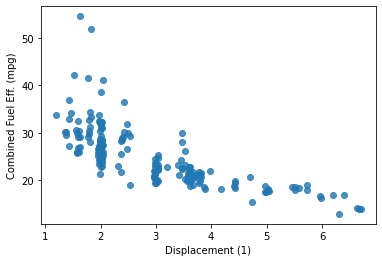

In [14]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False);
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Are there differences between cars with **automatic and manual transmissions** in terms of **fuel efficiency** and **engine size**? Lets use **SHAPE** encodings and see.

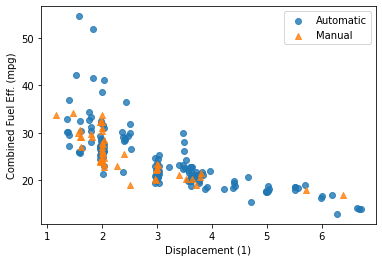

In [23]:
# the marker argument only takes a single string, so we will need to create a loop to plot each data point
# data setup - create a list of lists that will assign shapes to each transmission type
ttype_markers = [['Automatic', 'o'],
                 ['Manual','^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb',
              x_jitter = 0.04, fit_reg = False, marker = marker);

# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
# add a legend, and specify our labels
plt.legend(['Automatic', 'Manual']);

the color for each category was automatically updated, which is fortunate since theres quite a bit of overlap.

**CONCLUSION**: It's clear to see that cars with better fuel efficiency are all mostly of the automatic transmission type.


### 2. SIZE

Let's use size to add Carbon Dioxide Emissions as the third variable.

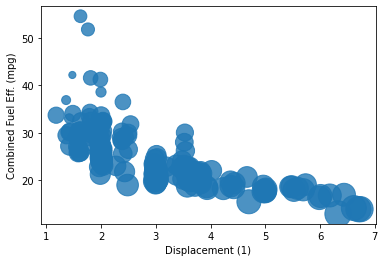

In [24]:
# use the scatter_kws argument to set the shape value.
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s' : fuel_econ_subset['co2']});
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

The trend is pretty clear here, but lets clean it up a bit:

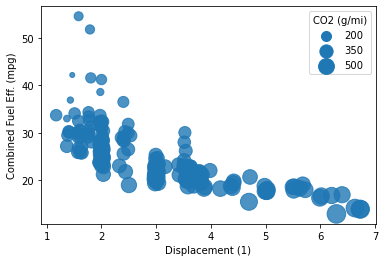

In [28]:
# reduce the shape size
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s' : fuel_econ_subset['co2']/2});
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# as a wrokaround for the size legend,we can set up dummy scatter plot sequences to construct it.
# using plotting functions in matplotlib & seborn returns plotting objects, lets store those using a loop
# that will set up our plt sizes for our legend.

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))

plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

**CONCLUSION:** It looks like as the engine size increases, the CO2 emissions increase as well. It also looks like the cars that have smaller engine sizes also have similar high CO2 emissions.


### 3. COLOR

[Documentation for `seaborn.color_palette`](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

#### *Qualitative Color Palette*
nominal data, where no ordering or ranking is implied.

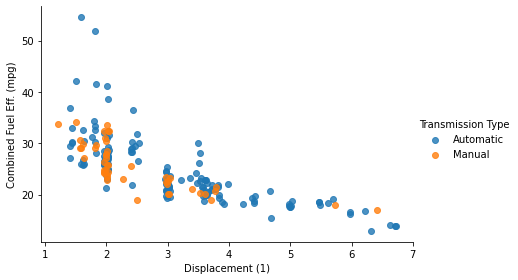

In [35]:
# included hue order, chart size (height), and legend title adjustments in the arguments
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);

# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

g.add_legend(title = 'Transmission Type');

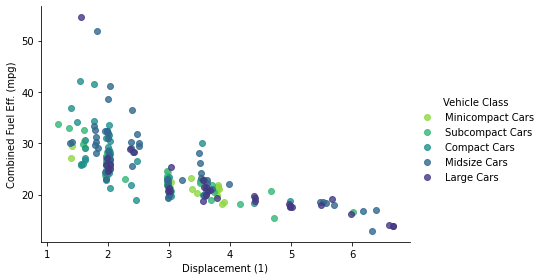

In [36]:
# included hue order, chart size (height), and legend title adjustments in the arguments
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
                height = 4, aspect = 1.5, palette = 'viridis_r')
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);

# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

g.add_legend(title = 'Vehicle Class');

#### *Sequencial Color Palette*
indicates lower to higher numerical values

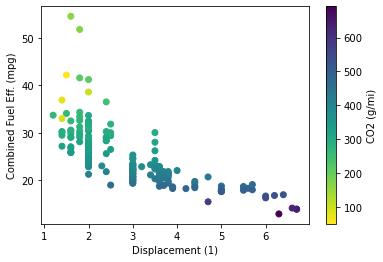

In [38]:
# for numeric variables, a scatterplot would be best.
plt.scatter(data = fuel_econ_subset, x = 'displ',y = 'comb', c = 'co2',
                cmap = 'viridis_r')

# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# add a color bar and label
plt.colorbar(label = 'CO2 (g/mi)');

## Multivariate Faceting

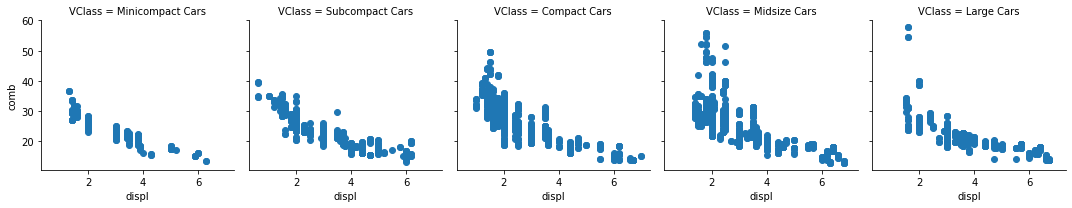

In [40]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb');

You can see the outliers for each vehicle class much clearer, as well as the slight bias towards smaller engines in the mini and subcompact car classes.

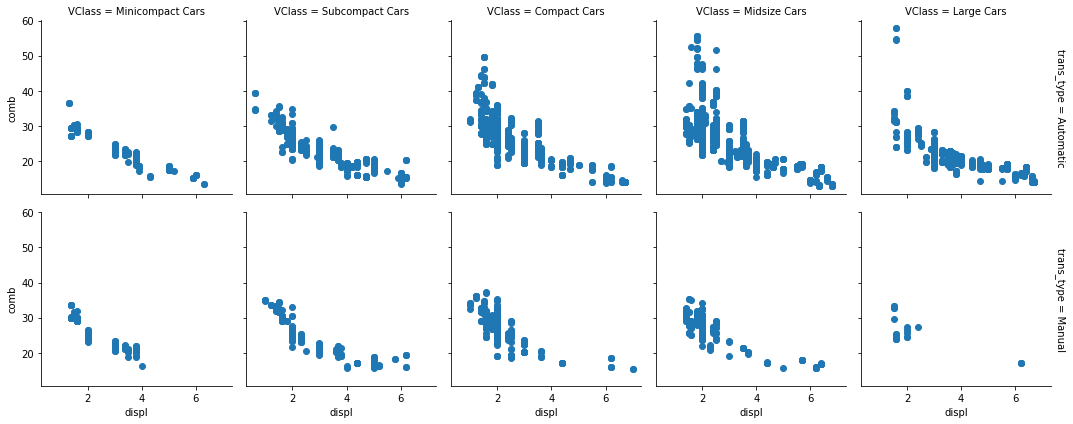

In [44]:
# add another variable to make this a multivariate plot. Tweek the labels so they are visible.
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type',
                margin_titles = True)
g.map(plt.scatter, 'displ', 'comb');

## Other Multivariate Adaptations of Bivariate Plots

### POINTPLOT
- add a third variable using the `hue` argument.
- offset each variable using `dodge` argument to resolve the overlap issue.

Lets use these examples when creating a pointplot that compares fuel efficiency across vehicle class, in terms of transmission types.

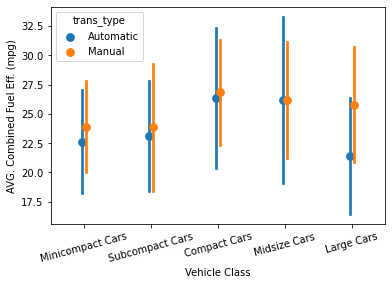

In [46]:
# you can also create a pointplot:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', hue = 'trans_type',
             ci = 'sd', linestyles = "", dodge = True)
             
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);

### CLUSTERED BAR CHART

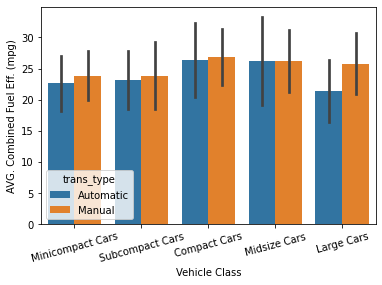

In [47]:
# you can also create a pointplot:
sb.barplot(data=fuel_econ, x='VClass', y='comb', hue = 'trans_type',
             ci = 'sd')
            
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);

### BOXPLOT
For better summarizations 

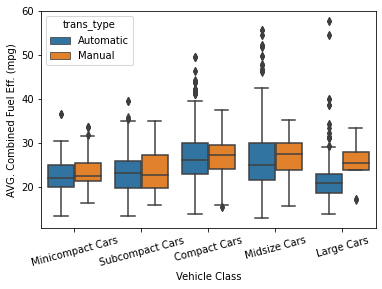

In [50]:
# you can also create a pointplot:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue = 'trans_type')
             
# add labels to each axis for clarity
plt.xlabel('Vehicle Class')
plt.ylabel('AVG. Combined Fuel Eff. (mpg)');
plt.xticks(rotation = 15);

### HEATMAPS
Can change the coloring to be based on the mean of a third variable.

Let's adjust this heatmaps coloring to the average CO2 output instead.

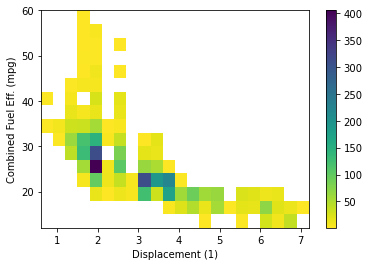

In [53]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
#place the colorbar on the chart
plt.colorbar()
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [54]:
"""STEP 1: Compute which bin each data point will fall into for the CO2 heatmap. 
"""

# `labels` arg is set to ID bins numerically
# `astype` method is used to make indexing easier
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False,
                   labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False,
                  labels = False).astype(int)

In [55]:
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int64

In [60]:
"""STEP 2: Count the number of points that fall into each bin
"""

# multi-index dataframes are hard to work with, use reset_index method to change this
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

"""STEP 3: Get our average CO2 emissions for each bin for the new weights argument"""

co2weights = fuel_econ['co2']/ n_points[displ_bins, comb_bins]

In [61]:
co2weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

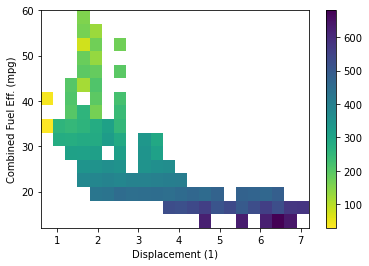

In [62]:
"""STEP 4: Update our weights argument with the new CO2 output variable"""

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y], weights = co2weights);
#place the colorbar on the chart
plt.colorbar()
# add labels to each axis for clarity
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### PLOT MATRICES

In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

In this example, let's look at the pairwise relationships the 6 combat statistics for each pokemon...

In [63]:
pokemon = pd.read_csv('pokemon.csv')

In [64]:
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


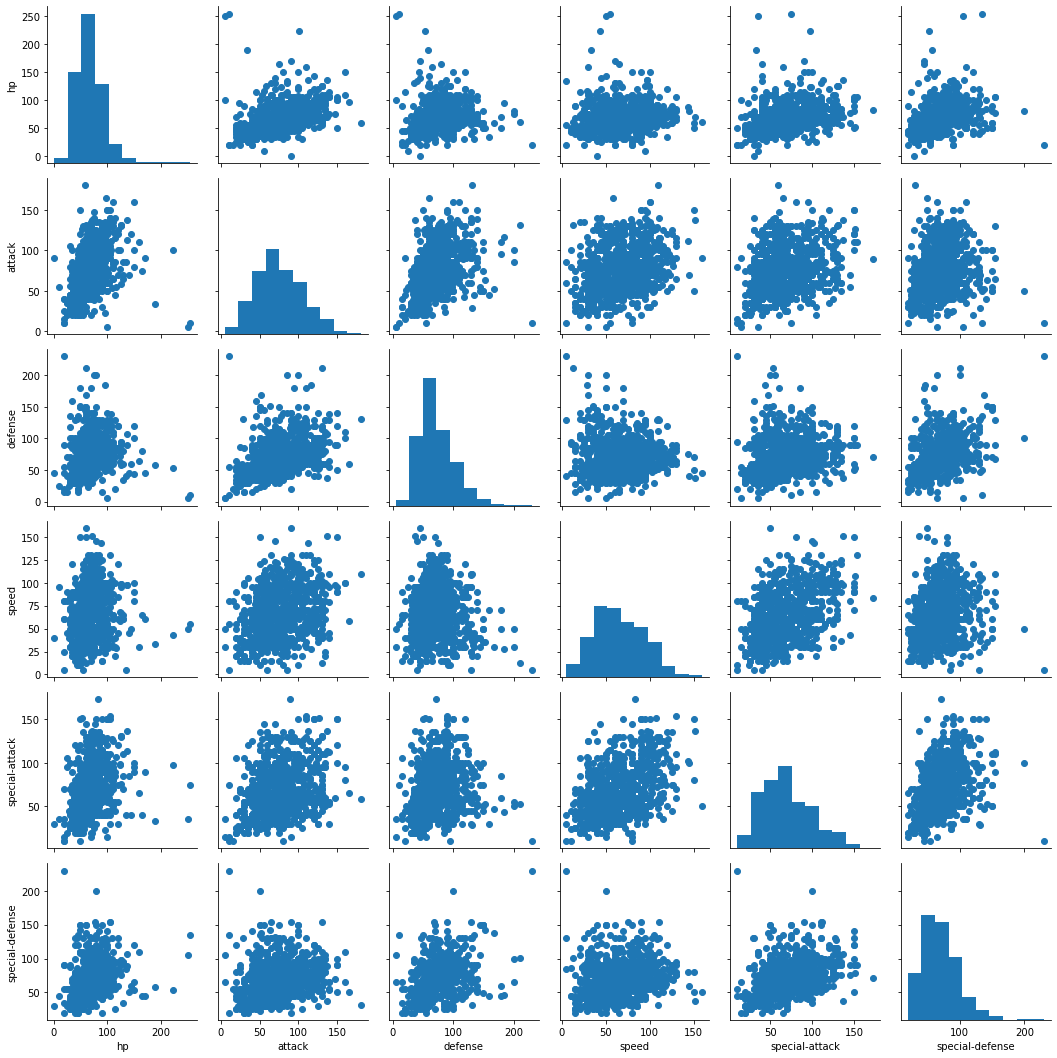

In [67]:
# Plot Matrix: Pokemon Stats
# vars MUST BE SPECIFIED or else it will include all variables by default

pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);

# use a scatter plot for numerical data on the off diagonals for reasons below
g.map_offdiag(plt.scatter);

# the diagonals for a scatterplot will be a straght line, since the column and row variable will be the same.
# lets change the chart type for these only.
g.map_diag(plt.hist);

### CORRELATION HEATMAP

We can gather numerical values using correlation heatmap

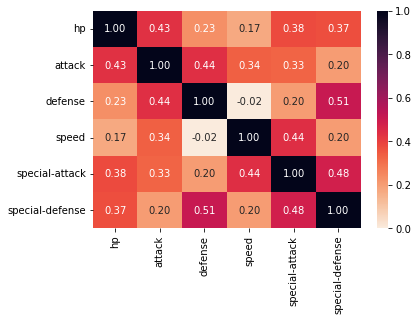

In [71]:
# use our pkmn_stats variable for the heatmap. reverse coloring using `cmap`,
# and add labels in decimal format up to two places

sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True,
          fmt = '.2f', vmin = 0);

## Extra Credit: Feature Engineering

As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

*For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur.*

#### PRACTICE
Lets look at biases in pokemon statistics. Lets see if a pokemons offensive stats are biased towards physical or special-attack, or if their defensive stats are similarly biased towards physical or special-defense.

In [74]:
"""Create new vaiables based on ratios"""
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense']/ pokemon['special-defense']

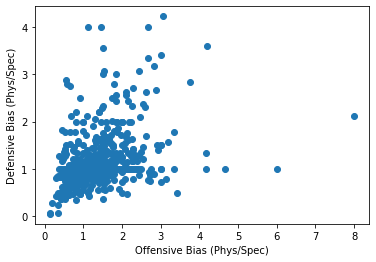

In [78]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio')
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

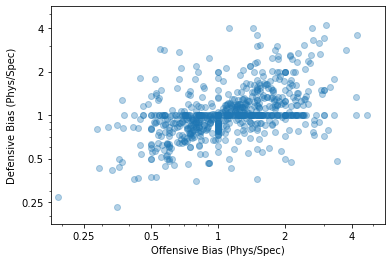

In [79]:
# lets polish this up by adding transparency, converting to logarithmic scale, adjusting + centering our tick marks
# and removing extreme outliers

plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log')
plt.yscale('log');
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc);
plt.xlim(2** -2.5, 2 ** 2.5)
plt.ylim(2** -2.5, 2 ** 2.5);

**INSIGHTS:** Looks like most points seem to fall along a diagonal line. In the upper right quadrant we have pokemon species that are physical biased in both offense and defense, and in the lower left quadrant we have pokemon that are special biased in both offense and defense.

Interestingly, there appears to be a **large number** of pokemon on the y = 1 line, showing **no defensive bias**. These pokemon have a wide range of offensive biases. And there are **much fewer** pokemon species on the x = 1 line, showing **no offensive bias**. 

These insights could not have been obtained without feature engineering!